<a href="https://colab.research.google.com/github/ywang1110/NLP/blob/main/Quora_Question_Pairs_Similarity_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://miro.medium.com/max/1440/1*YulfXLgM6rhCtaJHDgPPtQ.png"
 height="200"/>


#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

#Import the data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
train_set = pd.read_csv('/content/gdrive/My Drive/NLP project/data/train.csv')[0:120000]
test_set = pd.read_csv('/content/gdrive/My Drive/NLP project/data/test.csv')[0:30000]

In [ ]:
train_set.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
37138,37138,67619,67620,What are some good psychological thriller movi...,What are some good psychological thriller movies?,0
81217,81217,137938,137939,I'm helping a boy in my school that is overwei...,I love a boy very much and I think he likes me...,0
118251,118251,109244,192245,What did Edward Snowden do?,What is Edward Snowden like in person?,0
108112,108112,177706,121386,How can I stop worrying and over-thinking abou...,How do I stop over thinking everything?,1
117106,117106,190623,190624,"Which is more developed, India or Pakistan?",Which country is more developed: India or Paki...,1


In [ ]:
test_set.sample(5)

,test_id,question1,question2
23405,23405,Why campus should I choose - BITS Goa or BITS ...,How is life for an introvert in BITS handicapped?
3340,3340,Why do this some people get angry?,Why do I laracasts get angry and react?
18636,18636,How does one start a store?,How did Patanjali get its becoming How did fin...
25855,25855,How much does it cost a Naval vessel go throug...,How do I get job at Infosys or TCS after compl...
24245,24245,How did people learn to have better?,How do I learn how to have sex?


In [ ]:
train_questions1 = train_set['question1'].tolist()
train_questions2 = train_set['question2'].tolist()
test_questions1 = test_set['question1'].tolist()
test_questions2 = test_set['question2'].tolist()

In [ ]:
questions = train_questions1 + train_questions2 + test_questions1 + test_questions2
questions = list(map(str, questions)) # map -> iterator 
len(questions)

300000

#Tokenization

# common regex patterns: 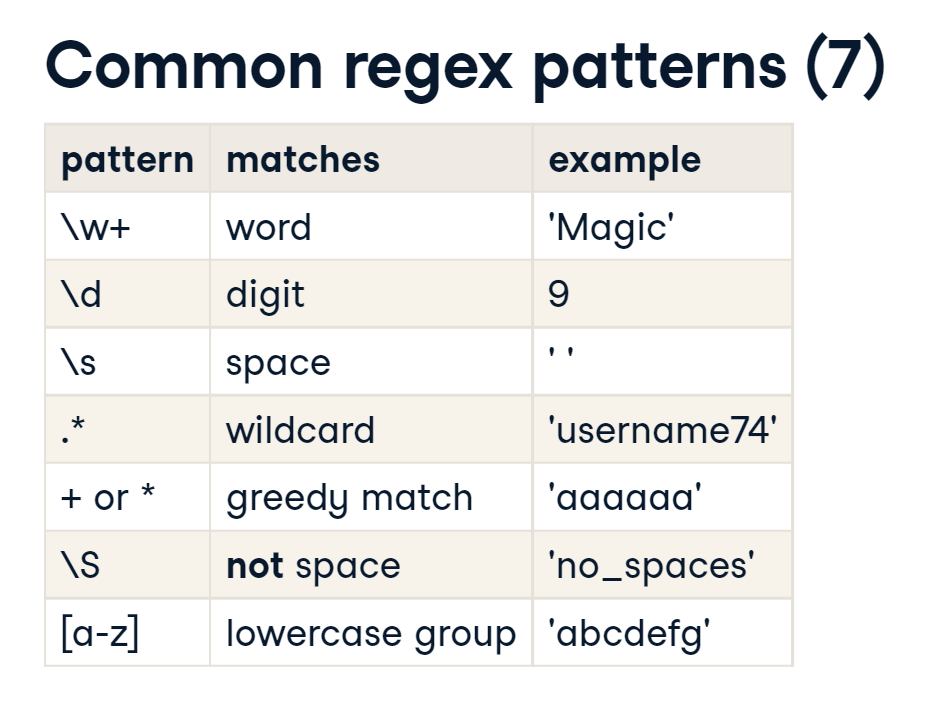

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+') # only words

In [ ]:
sentences = []
for p in tqdm.tqdm(questions):
  sentences.append(tokenizer.tokenize(str(p)))

100%|██████████| 300000/300000 [00:03<00:00, 79692.35it/s]


In [ ]:
print(questions[0:2])
print(sentences[0:2])

['What is the step by step guide to invest in share market in india?', 'What is the story of Kohinoor (Koh-i-Noor) Diamond?']
[['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india'], ['What', 'is', 'the', 'story', 'of', 'Kohinoor', 'Koh', 'i', 'Noor', 'Diamond']]


In [ ]:
def get_words(input_sentences):
  output_sentences = []
  for p in input_sentences:
    output_sentences.append(tokenizer.tokenize(str(p)))
  return output_sentences

In [ ]:
train_questions1_words = get_words(train_questions1)
train_questions2_words = get_words(train_questions2)
test_questions1_words = get_words(test_questions1)
test_questions2_words = get_words(test_questions2)

##TF-IDF (Term Frequency — Inverse Document Frequency)
Compute a weight to each word which signifies the importanace of the word in the document and corpus. <br/>
TF-IDF = Term Frequency (TF)*Inverse Document Frequency (IDF)
**output** weight(scalar)
---
*  **Term frequency (TF)**: frequency of a word in a document (highly depends on the length of the document and the generality of word) <br/> TF is individually to each document and word<br/> ***tf(t,d) = count of t in d / number of words in d***


*  Why not just use TF?<br/>
1. common words, as well as stop-words (e.g. is am are) will have very high values and give those words a very high importance
2. 

---
*  **Document Frequency:** the number of documents in which the word is present.We consider one occurrence if the term consists in the document at least once, we do not need to know the number of times the term is present.<br/> ***df(t) = occurrence of t in documents***
---
**Inverse Document Frequency**
idf(t) = N/df


*   Large corpus -> IDF explodes <br/>idf(t) = log(N/df)
*   word which is not in vocab <br/>df=0 -> idf(t)=log(N/(df+1))


---
*  t-term (word)
*  d-document(set of words)
*  N-count of corpus
*  corpus-the total document set

**Basis version of IF-IDF score:**<br/>
tf-idf(t,d) = tf(t,d)*log(N/(df+1))




https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

In [ ]:
from gensim import corpora
from gensim.models import TfidfModel

In [ ]:
dictionary = corpora.Dictionary(sentences)  # Create a mapping with an ids for each token.
new_corpus = [dictionary.doc2bow(txt) for txt in sentences] # Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.

In [ ]:
tfidf=TfidfModel(new_corpus) # implements functionality related to the TF-IDF              # fit model

In [ ]:
tfidf[dictionary.doc2bow(['what', 'is', 'this'])] # (token_id, token_count) 

[(6, 0.2407849128206825), (62, 0.6570005267016968), (899, 0.7144039009353386)]

In [ ]:
def get_sentences_tfidfs(input_sentences):
  output_vectors = []
  for p in input_sentences:
    result = tfidf[dictionary.doc2bow(p)]
    output_vectors.append(result)
  return output_vectors

In [ ]:
train_questions1_tfidfs = get_sentences_tfidfs(train_questions1_words)
train_questions2_tfidfs = get_sentences_tfidfs(train_questions2_words)
test_questions1_tfidfs = get_sentences_tfidfs(test_questions1_words)
test_questions2_tfidfs = get_sentences_tfidfs(test_questions2_words)

In [ ]:
print(train_questions2_words[1])
print(train_questions2_tfidfs[1])

['What', 'would', 'happen', 'if', 'the', 'Indian', 'government', 'stole', 'the', 'Kohinoor', 'Koh', 'i', 'Noor', 'diamond', 'back']
[(0, 0.03689174260974629), (10, 0.07414068369213528), (13, 0.407445916466027), (14, 0.3949851825339399), (15, 0.426363561046035), (16, 0.21677330542161743), (129, 0.13776037832366533), (216, 0.20673749251608306), (256, 0.19268540207594384), (458, 0.16456260111687418), (584, 0.1273697522946146), (905, 0.1904640344823664), (4950, 0.39004005192886004), (9772, 0.3343388492302425)]


In [ ]:
dictionary[1]

'by'

#Word2Vec
The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling
* Skip-gram: word -> words in a window
* CBOW: words (windows) -> word   <br/>

output: vector/embedding of words

In [ ]:
from gensim.models import Word2Vec

In [ ]:
word2vec = Word2Vec(sentences=sentences, size=100, window=8, iter=10, min_count=1)   # the length of the vector to represent each token (word)
# window: the maximum distance between a target word and words around the target word
# min_count: words with an occurance less than this count will be ignored
# workers: the number of threads to use while using (default=3)

In [ ]:
word2vec.wv.vocab  # dictionary

{'What': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40890>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40a50>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40350>,
 'step': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b400d0>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40110>,
 'guide': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40850>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b409d0>,
 'invest': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40210>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40290>,
 'share': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b401d0>,
 'market': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40ad0>,
 'india': <gensim.models.keyedvectors.Vocab at 0x7fe6f9b40090>,
 'story': <gensim.models.keyedvectors.Vocab at 0x7fe6e05d5050>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fe6e05d5090>,
 'Kohinoor': <gensim.models.keyedvectors.Vocab at 0x7fe6e05d50d0>,
 'Koh': <gensim.models.keyedvectors.Vocab at 0x7fe6e05

In [ ]:
list(word2vec.wv.vocab)  # the learned vocabulary of tokens(words)

['What',
 'is',
 'the',
 'step',
 'by',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'india',
 'story',
 'of',
 'Kohinoor',
 'Koh',
 'i',
 'Noor',
 'Diamond',
 'How',
 'can',
 'I',
 'increase',
 'speed',
 'my',
 'internet',
 'connection',
 'while',
 'using',
 'a',
 'VPN',
 'Why',
 'am',
 'mentally',
 'very',
 'lonely',
 'solve',
 'it',
 'Which',
 'one',
 'dissolve',
 'water',
 'quikly',
 'sugar',
 'salt',
 'methane',
 'and',
 'carbon',
 'di',
 'oxide',
 'Astrology',
 'Capricorn',
 'Sun',
 'Cap',
 'moon',
 'cap',
 'rising',
 'what',
 'does',
 'that',
 'say',
 'about',
 'me',
 'Should',
 'buy',
 'tiago',
 'be',
 'good',
 'geologist',
 'When',
 'do',
 'you',
 'use',
 'シ',
 'instead',
 'し',
 'Motorola',
 'company',
 'Can',
 'hack',
 'Charter',
 'Motorolla',
 'DCX3400',
 'Method',
 'find',
 'separation',
 'slits',
 'fresnel',
 'biprism',
 'read',
 'YouTube',
 'comments',
 'make',
 'Physics',
 'easy',
 'learn',
 'was',
 'your',
 'first',
 'sexual',
 'experience',
 'like',
 'are',

In [ ]:
# review the embedded vector for a specific token 
word2vec['man']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-4.1340327 , -0.37366557, -0.9315342 ,  3.43876   , -1.0366291 ,
        0.09574973,  0.35748821,  0.8868166 ,  3.247127  , -1.2207118 ,
        1.6094689 , -2.1900194 ,  1.5312272 , -0.41371664,  0.08835531,
       -1.2459778 ,  1.7957991 , -0.62196875,  2.0142245 ,  2.1491609 ,
        1.0910006 , -1.3956625 , -3.846853  , -1.2458317 ,  1.589625  ,
       -0.14031805,  0.08894043,  2.9916577 ,  1.6014818 ,  0.39344501,
        4.2061877 , -3.1334617 , -0.16515636, -1.0955743 , -0.3086237 ,
        1.345915  ,  1.020969  ,  0.8172127 ,  2.0239768 , -0.50105494,
       -0.5937892 , -3.8024127 , -0.78351986, -0.73739636, -1.6172758 ,
       -2.2718713 ,  0.72885007, -1.1846019 , -2.494002  ,  1.3921996 ,
        0.21871875,  2.1060414 , -1.9473203 , -0.33404735,  1.2842758 ,
       -0.20438594, -2.0742805 ,  3.1811855 ,  0.3766577 ,  0.9418743 ,
       -0.1135455 , -1.6142939 ,  1.5796521 , -2.4860828 , -0.7627049 ,
        1.0367341 , -2.7483761 , -3.0378423 ,  0.13393079,  0.53

In [ ]:
word2vec.wv.similarity('person', 'man')

0.7076294

In [ ]:
word2vec.wv.vocab['man'].count

1078

In [ ]:
len(word2vec.wv.vocab)

71020

##Train Word2Vector/GloVe
* based on **our own word vector**
 - Pros: 
 - Cons: time-consuming, demanding for computer

* **Pre-trained word embedding (e.g. twitter.27B)** 
 - Pros: 
 - Cons:


##Load pretrained word embedding (Stanford's GloVe Embedding)

- GloVe (Global Vectors for Word Representation)
- a file containing tokens+word vectors
- download the model first, such as `glove.6B.100d.txt` from https://nlp.stanford.edu/projects/glove/   (100d -> 100-d)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
glove_vector_path = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt'

###Convert GloVe vectors to word2vector

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_input_file = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt'
glove_output_file = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt.word2vec'
_ = glove2word2vec(glove_input_file, glove_output_file)

###Load GloVe Vector

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
# load the GloVe model

filename = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary = False) # Note that the converted file is ASCII format, not binary, so we set binary=False when loading

In [ ]:
glove_model.wv.similarity('person', 'man')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.7526816

In [ ]:
glove_model.wv['man']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 3.7293e-01,  3.8503e-01,  7.1086e-01, -6.5911e-01, -1.0128e-03,
        9.2715e-01,  2.7615e-01, -5.6203e-02, -2.4294e-01,  2.4632e-01,
       -1.8449e-01,  3.1398e-01,  4.8983e-01,  9.2560e-02,  3.2958e-01,
        1.5056e-01,  5.7317e-01, -1.8529e-01, -5.2277e-01,  4.6191e-01,
        9.2038e-01,  3.1001e-02, -1.6246e-01, -4.0567e-01,  7.8621e-01,
        5.7722e-01, -5.3501e-01, -6.8228e-01,  1.6987e-01,  3.6310e-01,
       -7.1773e-02,  4.7233e-01,  2.7806e-02, -1.4951e-01,  1.7543e-01,
       -3.7573e-01, -7.8517e-01,  5.8171e-01,  8.6859e-01,  3.1445e-02,
       -4.5897e-01, -4.0917e-02,  9.5897e-01, -1.6975e-01,  1.3045e-01,
        2.7434e-01, -6.9485e-02,  2.2402e-02,  2.4977e-01, -2.1536e-01,
       -3.2406e-01, -3.9867e-01,  6.8613e-01,  1.7923e+00, -3.7848e-01,
       -2.2477e+00, -7.7025e-01,  4.6582e-01,  1.2411e+00,  5.7756e-01,
        4.1151e-01,  8.4328e-01, -5.4259e-01, -1.6715e-01,  7.3927e-01,
       -9.3477e-02,  9.0278e-01,  5.0889e-01, -5.0031e-01,  2.64

##Word vectors --> Sentence Vectors

1. Merge: Max, Average, '[w1, w2, w3, ...., wn]'  <br/>*e.g. w1 100-d vector*
2. TF-IDF: weighted sum
3. Deep learning: embedding, '[f1, f2, ..., fn]' (LSTM, GRU, Attention) <br/> f---> feature<br/>
    - Last output: fn as 
    - Hidden Vector (LSTM, GRU), hn
    - Attention: '[aw1, aw2, ... , awn]' (attention weights), weighted sum -> sentence vector

4. Doc2Vec: sentence ---> embedding (BERT sentence embedding)


#Construct TF-IDF & Word2Vactor Feasure

In [ ]:
train_questions1_tfidfs[0]  # (dict_id, weight)

[(0, 0.04647779709270368),
 (1, 0.1822570720039786),
 (2, 0.3795121200789133),
 (3, 0.14339205961233994),
 (4, 0.2743635788477922),
 (5, 0.2887230565095903),
 (6, 0.0641007660924909),
 (7, 0.27256152978155446),
 (8, 0.30337312129044286),
 (9, 0.6810270327800437),
 (10, 0.046702804058475544),
 (11, 0.07058432928597289)]

In [ ]:
dictionary[2]

'guide'

In [ ]:
word2vec.wv['by'].shape

(100,)

In [ ]:
y=train_questions1_tfidfs[0] 
y[0]

(0, 0.04647779709270368)

In [ ]:
def get_features(input_sentences, sentence_tfidfs, word2vec, dictionary):
    output_features = []
    for p, tf_idf in zip(input_sentences, sentence_tfidfs):
        sentence_features = [word2vec.wv[dictionary[x[0]]]*x[1] for x in tf_idf]
        output_features.append(np.array(sentence_features).sum(0))
    return output_features

In [ ]:
train_questions1_features = get_features(train_questions1, train_questions1_tfidfs, word2vec, dictionary)
train_questions2_features = get_features(train_questions2, train_questions2_tfidfs, word2vec, dictionary)
test_question1_features = get_features(test_questions1_words, test_questions1_tfidfs, word2vec, dictionary)
test_question2_features = get_features(test_questions2_words, test_questions2_tfidfs, word2vec, dictionary)

In [ ]:
len(train_questions1_tfidfs)

120000

In [ ]:
train_questions1_features[10].shape

(100,)

##Train and Test data preparation

*  **conact**  100-d vectors(2) ->  200-d vector (1)
*  **product** 100-d vectors(2) ->  200-d vector (1)  

cosine = **x*y**/(|x|*|y|)

In [ ]:
def fuse_question1_question2_by_concat(question1, question2):
  fused_results = []
  for q1, q2 in zip(question1, question2):
    f = np.zeros(200)
    f[0:100] = q1
    f[100:200] = q2
    fused_results.append(f)
  return np.array(fused_results)

In [ ]:
train_features = fuse_question1_question2_by_concat(train_questions1_features, train_questions2_features) 
test_features = fuse_question1_question2_by_concat(test_question1_features, test_question2_features)

In [ ]:
train_features.shape

(120000, 200)

In [ ]:
train_labels = train_set['is_duplicate']
train_labels

0         0
1         0
2         0
3         0
4         0
         ..
119995    0
119996    0
119997    0
119998    1
119999    0
Name: is_duplicate, Length: 120000, dtype: int64

# Train and Test

##XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
params = {
    'booster':'gbtree',    # gbtree or gblinear
    'objective':'binary:logistic', # onjective: specify the learning task and corresponding learning objective, users can pass a self-defined function to it. | 'binary:logstic' output probability 
    'eval_metric':'logloss',  
    'max_depth':10, # default=6
    'lambda':1,    # L2 regularization term on weihghts, default=0
    'subsample':0.75, # 0.75 means that xgboost only randomly collected 75% of the training data instance to grow the tree and this will prevent overfitting
    'colsample_bytree':0.75,  # 0.75 means that only 75% columns are collected when constructing each tree 
    'eta':0.2,  # eta controls the learning rate 
    'seed':0,  # 
    'nthread':8
}

In [ ]:
dtrain = xgb.DMatrix(train_features, label=train_labels)

In [ ]:
watch_list = [(dtrain, 'dtrain')]
bst = xgb.train(params, dtrain, num_boost_round=50, evals=watch_list)

[0]	dtrain-logloss:0.644864
[1]	dtrain-logloss:0.609146
[2]	dtrain-logloss:0.579746
[3]	dtrain-logloss:0.556325
[4]	dtrain-logloss:0.535338
[5]	dtrain-logloss:0.516722
[6]	dtrain-logloss:0.501661
[7]	dtrain-logloss:0.488561
[8]	dtrain-logloss:0.474431
[9]	dtrain-logloss:0.4634
[10]	dtrain-logloss:0.453319
[11]	dtrain-logloss:0.442243
[12]	dtrain-logloss:0.432697
[13]	dtrain-logloss:0.4234
[14]	dtrain-logloss:0.415733
[15]	dtrain-logloss:0.407811
[16]	dtrain-logloss:0.399751
[17]	dtrain-logloss:0.393299
[18]	dtrain-logloss:0.386511
[19]	dtrain-logloss:0.380692
[20]	dtrain-logloss:0.373809
[21]	dtrain-logloss:0.367803
[22]	dtrain-logloss:0.361596
[23]	dtrain-logloss:0.356914
[24]	dtrain-logloss:0.351944
[25]	dtrain-logloss:0.347858
[26]	dtrain-logloss:0.343636
[27]	dtrain-logloss:0.33786
[28]	dtrain-logloss:0.33332
[29]	dtrain-logloss:0.329896
[30]	dtrain-logloss:0.325547
[31]	dtrain-logloss:0.320234
[32]	dtrain-logloss:0.317108
[33]	dtrain-logloss:0.314757
[34]	dtrain-logloss:0.312786
[

In [ ]:
dtest = xgb.DMatrix(test_features)
ypred = bst.predict(dtest)

##Netrual Network

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model=Sequential()
model.add(Dense(units=256, input_dim=200, activation='relu'))
model.add(Dense(units=256, input_dim=256, activation='relu'))
model.add(Dense(units=1, input_dim=256, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9))

In [ ]:
model.fit(train_features, train_labels, epochs=10, batch_size=128)

Epoch 1/10
938/938 [==============================] - 18s 5ms/step - loss: 0.5687
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4771
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4495
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4309
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4119
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3912
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3776
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3624
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3469
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3316


In [ ]:
ypred=model.predict(test_features, batch_size=100)

#EDA (Optional)

- get to know about the data

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            120000 non-null  int64 
 1   qid1          120000 non-null  int64 
 2   qid2          120000 non-null  int64 
 3   question1     120000 non-null  object
 4   question2     119999 non-null  object
 5   is_duplicate  120000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.5+ MB


##Distribution of data points among output class

In [ ]:
percentage_noDup = train_set['is_duplicate'].mean()
percentage_Dup = np.mean(train_set['is_duplicate']==0)

In [ ]:
print('Percentage Question pairs that are not duplicate = {:.2f}%'.format(percentage_noDup*100))
print('Percentage Question pairs that are not duplicate = {:.2f}%'.format(percentage_Dup*100))

Percentage Question pairs that are not duplicate = 37.21%
Percentage Question pairs that are not duplicate = 62.79%


In [ ]:
train_qs = pd.Series(train_set["question1"].tolist()+train_set['question2'].tolist()).astype(str)
test_qs = pd.Series(test_set["question1"].tolist()+test_set['question2'].tolist()).astype(str)

### Generate Word Cloud

(-0.5, 1439.5, 1079.5, -0.5)

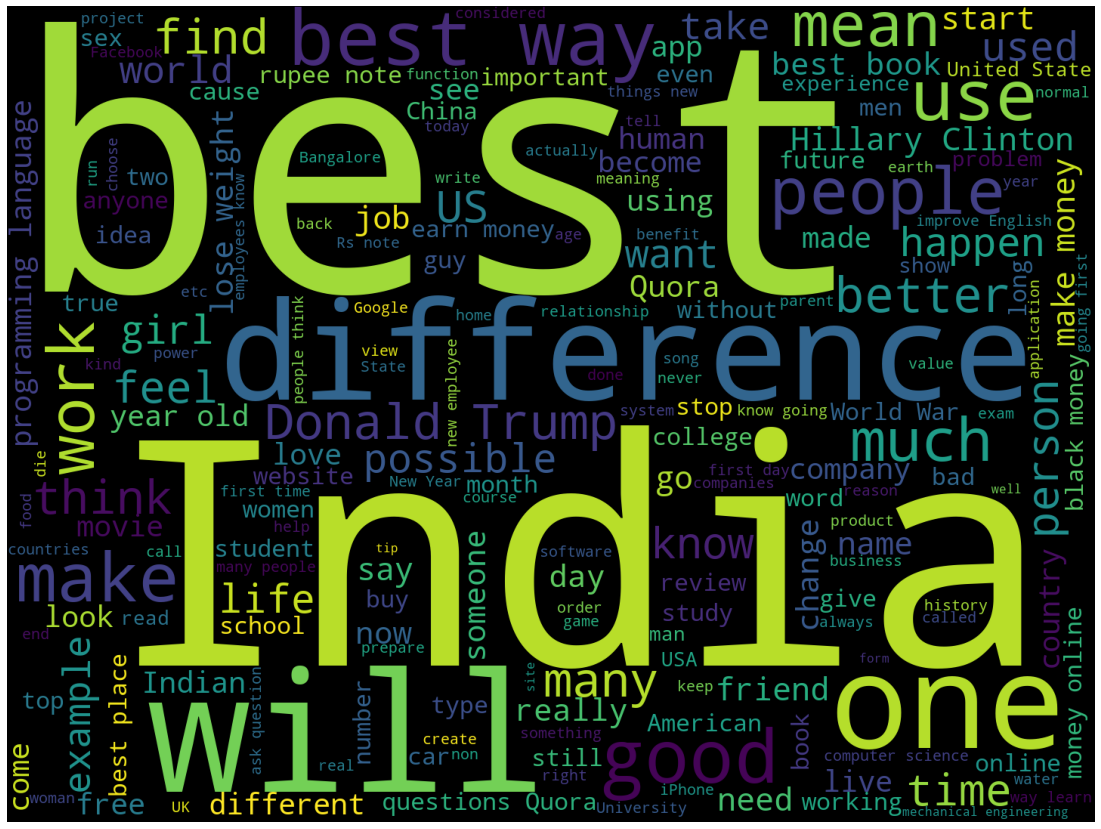

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

##Unique vs. repeated Questions

In [ ]:
qids=pd.Series(train_set['qid1'].tolist()+train_set['qid2'].tolist())
qids=qids.value_counts()
qids

2559      40
4044      33
30782     31
17978     25
18753     24
          ..
142231     1
140182     1
146325     1
144276     1
159758     1
Length: 194716, dtype: int64

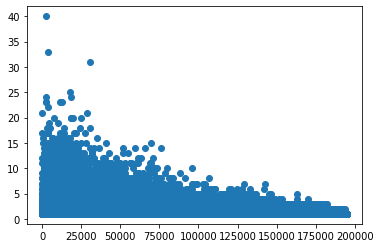

In [ ]:
plt.scatter(qids.index, qids)

In [ ]:
unique_ids=qids.index
print('Number of unique ids={}'.format(len(unique_ids)))

Number of unique ids=194716


In [ ]:
qs_morethan_onetime=np.sum(qids>1)
print('Number of unique questions that appears more than once={}'.format(np.sum(qids>1)))
percentage_morethan_once=np.mean(qids>1)
print('Percentage of unique questions that appears more than once={:.2f}%'.format(percentage_morethan_once*100))

Number of unique questions that appears more than once=24750
Percentage of unique questions that appears more than once=12.71%


In [ ]:
qs_max=np.max(qids)
qs_max
print('Max number of times a single question is repeated={}'.format(qs_max))

Max number of times a single question is repeated=40


In [ ]:
# check if there are any duplicated pair of questions
pair_duplicates=train_set.groupby(['qid1','qid2'])['id'].count()
pair_duplicates

qid1    qid2  
1       2         1
3       4         1
4       32881     1
5       6         1
7       8         1
                 ..
194707  194708    1
194709  194710    1
194711  171467    1
194712  194713    1
194715  194716    1
Name: id, Length: 120000, dtype: int64

In [ ]:
if np.sum(pair_duplicates>1)==0:
  print('There is no duplicate pair of questions')

There is no duplicate pair of questions


##Frequency of different questions

In [ ]:
qids

2559      40
4044      33
30782     31
17978     25
18753     24
          ..
142231     1
140182     1
146325     1
144276     1
159758     1
Length: 194716, dtype: int64

Text(0, 0.5, 'Count')

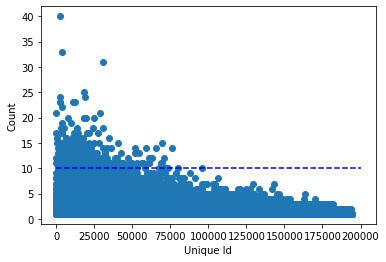

In [ ]:
plt.scatter(qids.index, qids)
plt.hlines(y=10, xmax=200000, xmin=0, linestyles='dashed', colors='b')
plt.xlabel('Unique Id')
plt.ylabel('Count')

##Missing values

In [ ]:
train_set.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [ ]:
train_set[train_set.isnull().any(axis=1)]   # check if 'True' is present in rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0


In [ ]:
#Fill an empty space inplace of Null value
train_set=train_set.fillna('')
train_set.isnull().sum(axis=0)

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
train_set[train_set.isnull().any(axis=1)] # we don't have any Null value in our dataframe

,id,qid1,qid2,question1,question2,is_duplicate


In [ ]:
test_set=test_set.fillna('')
test_set[test_set.isnull().any(axis=1)]

,test_id,question1,question2


##Basic Feature Extraction (get to know the data)

**New features construction**<br/>

*   **freq_qid1**=Frequency of qid1
*   **freq_qid2**=Frequency of qid2
*   **q1len**=Length of q1 (Characters+space)
*   **q2len**=Length of q2
*   **q1_n_words**=Number of words in Question 1
*   **q2_n_words**=Number of words in Question 2
*   **word_Common**=Number of common words in question 1 and question 2
*   **word_Total**=Total number of word in question 1 and question 2
*   **word_Share**=word_Common/Total_word
*   **freq_q1+freq_q2**=sum total of frequency of qid1 and qid2
*   **freq_q1-freq_q2**=absoulte difference of frequency of qid1 and qid2




In [ ]:
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
train_set['freq_qid1']=train_set.groupby('qid1')['id'].transform('count')  # pandas.DataFrame.transform -> Call func on self producing a DataFrame with transformed values|same lenght - similar with window function in SQL
train_set['freq_qid2']=train_set.groupby('qid2')['id'].transform('count')  
train_set['q1len']=train_set['question1'].str.len()  # pandas.Series.str.len -> Compute the length of each element in string (characters+spaces)
train_set['q2len']=train_set['question2'].str.len()
train_set['q1_n_words']=train_set['question1'].apply(lambda x: len(str(x).split(' ')))
train_set['q2_n_words']=train_set['question2'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
def normalized_word_Common(row):
  w1=set(map(lambda x: x.lower().strip(), str(row['question1']).split(' ')))
  w2=set(map(lambda x: x.lower().strip(), str(row['question2']).split(' ')))
  return 1.0*len(w1 & w2)
train_set['word_Common']=train_set.apply(normalized_word_Common, axis=1)

In [ ]:
def normalized_word_Total(row):
  w1=set(map(lambda x: x.lower().strip(), str(row['question1']).split(' ')))
  w2=set(map(lambda x: x.lower().strip(), str(row['question2']).split(' ')))
  return (len(w1)+len(w2))*1.0
train_set['word_Total']=train_set.apply(normalized_word_Total, axis=1)

In [ ]:
train_set['word_share']=train_set['word_Common']/train_set['word_Total']
train_set['freq_q1+freq_q2']=train_set['freq_qid1']+train_set['freq_qid2']
train_set['freq_q1-freq_q2']=np.abs(train_set['freq_qid1']-train_set['freq_qid2'])

In [ ]:
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2.0,20.0,0.100000,2,0


In [ ]:
train_set.describe()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,59999.500000,88273.497000,88405.299650,0.372075,1.549633,1.612233,59.329900,59.974017,10.913925,11.168658,4.508042,21.079883,0.223695,3.161867,0.658133
std,34641.160489,56829.791002,57022.605467,0.483360,1.468044,1.847872,29.874824,34.050888,5.425334,6.367629,3.095849,8.611147,0.128259,2.817369,1.665168
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,2.000000,0.000000
25%,29999.750000,37634.500000,37368.500000,0.000000,1.000000,1.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.125000,2.000000,0.000000
50%,59999.500000,83883.000000,83947.500000,0.000000,1.000000,1.000000,52.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.217391,2.000000,0.000000
75%,89999.250000,136531.250000,137105.750000,1.000000,1.000000,1.000000,71.000000,71.000000,13.000000,13.000000,6.000000,25.000000,0.318182,3.000000,1.000000
max,119999.000000,194715.000000,194716.000000,1.000000,18.000000,31.000000,623.000000,1169.000000,125.000000,237.000000,38.000000,166.000000,0.500000,39.000000,30.000000


In [ ]:
print('Minimum length of the questions in question1 = {}'.format(np.min(train_set['q1_n_words'])))
print('Minimum length of the questions in question2 = {}'.format(np.min(train_set['q2_n_words'])))
print('Number of questions with minimum length in question1 = {}'.format((train_set['q1_n_words']==1).sum()))
print('Number of questions with minimum length in question2 = {}'.format((train_set['q2_n_words']==1).sum()))

Minimum length of the questions in question1 = 1
Minimum length of the questions in question2 = 1
Number of questions with minimum length in question1 = 20
Number of questions with minimum length in question2 = 7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


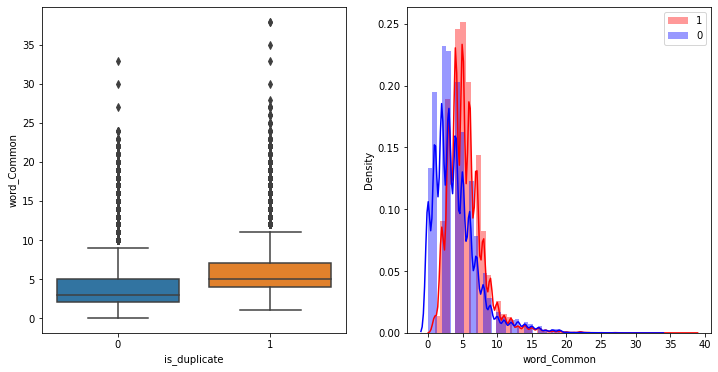

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_Common', data = train_set)

plt.subplot(1,2,2)
sns.distplot(train_set[train_set['is_duplicate'] == 1.0]['word_Common'] , label = "1", color = 'red')
sns.distplot(train_set[train_set['is_duplicate'] == 0.0]['word_Common'], label = "0" , color = 'blue' )
plt.legend()
plt.show()



*   The distribution of the word_Common feature in duplicate or non-duplicate pair are highly overlap. Therefore, this feature can not be used for classification



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


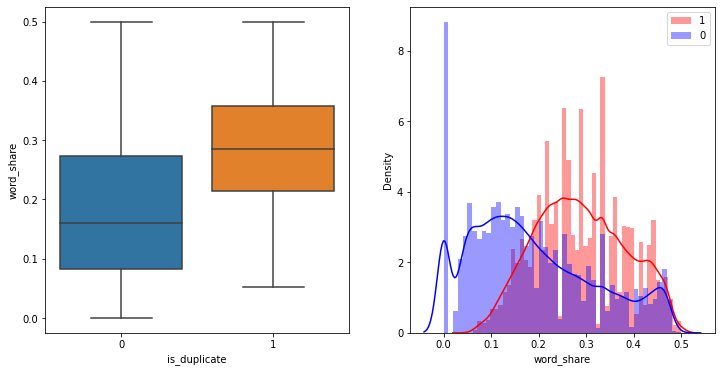

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_share', data = train_set)

plt.subplot(1,2,2)
sns.distplot(train_set[train_set['is_duplicate'] == 1.0]['word_share'] , label = "1", color = 'red')
sns.distplot(train_set[train_set['is_duplicate'] == 0.0]['word_share'], label = "0" , color = 'blue' )
plt.legend()
plt.show()

bold text#NLP related (from Datacamp)

> Indented block

> Indented block

> Indented block

> Indented block

1.   List item

1.   List item
2.   List item


2.   List item











# NLP related
1. **Preprocessing** 
  - Tokenization to create a bag of words
  - lowercasing words
  - Lemmatization/Stemming (shorten words to their root stems)
  - removing stop words, puncutation or unwanted words. 

##Tokenization

In [ ]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

### Regular expression & Word tokenization
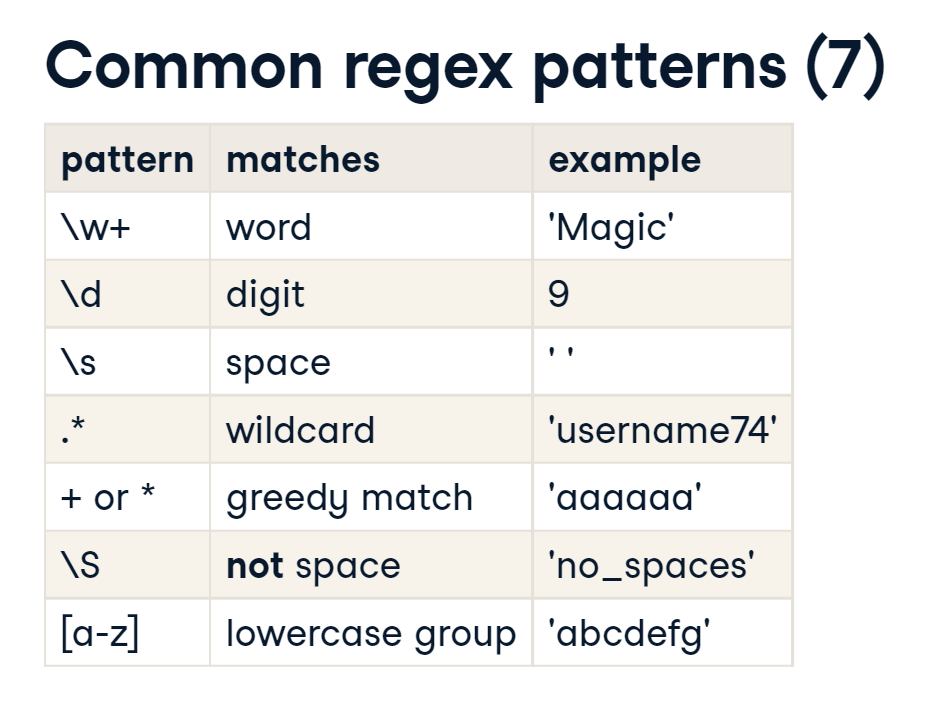

### Regex groups
* Or -> |
* define a group -> ()
* define a explicit character ranges -> []

In [ ]:
import re

In [ ]:
# find all digits and words
match_digits_and_words = ('(\w+|\d+)')
re.findall(match_digits_and_words, 'he has 11 cats')

['he', 'has', '11', 'cats']

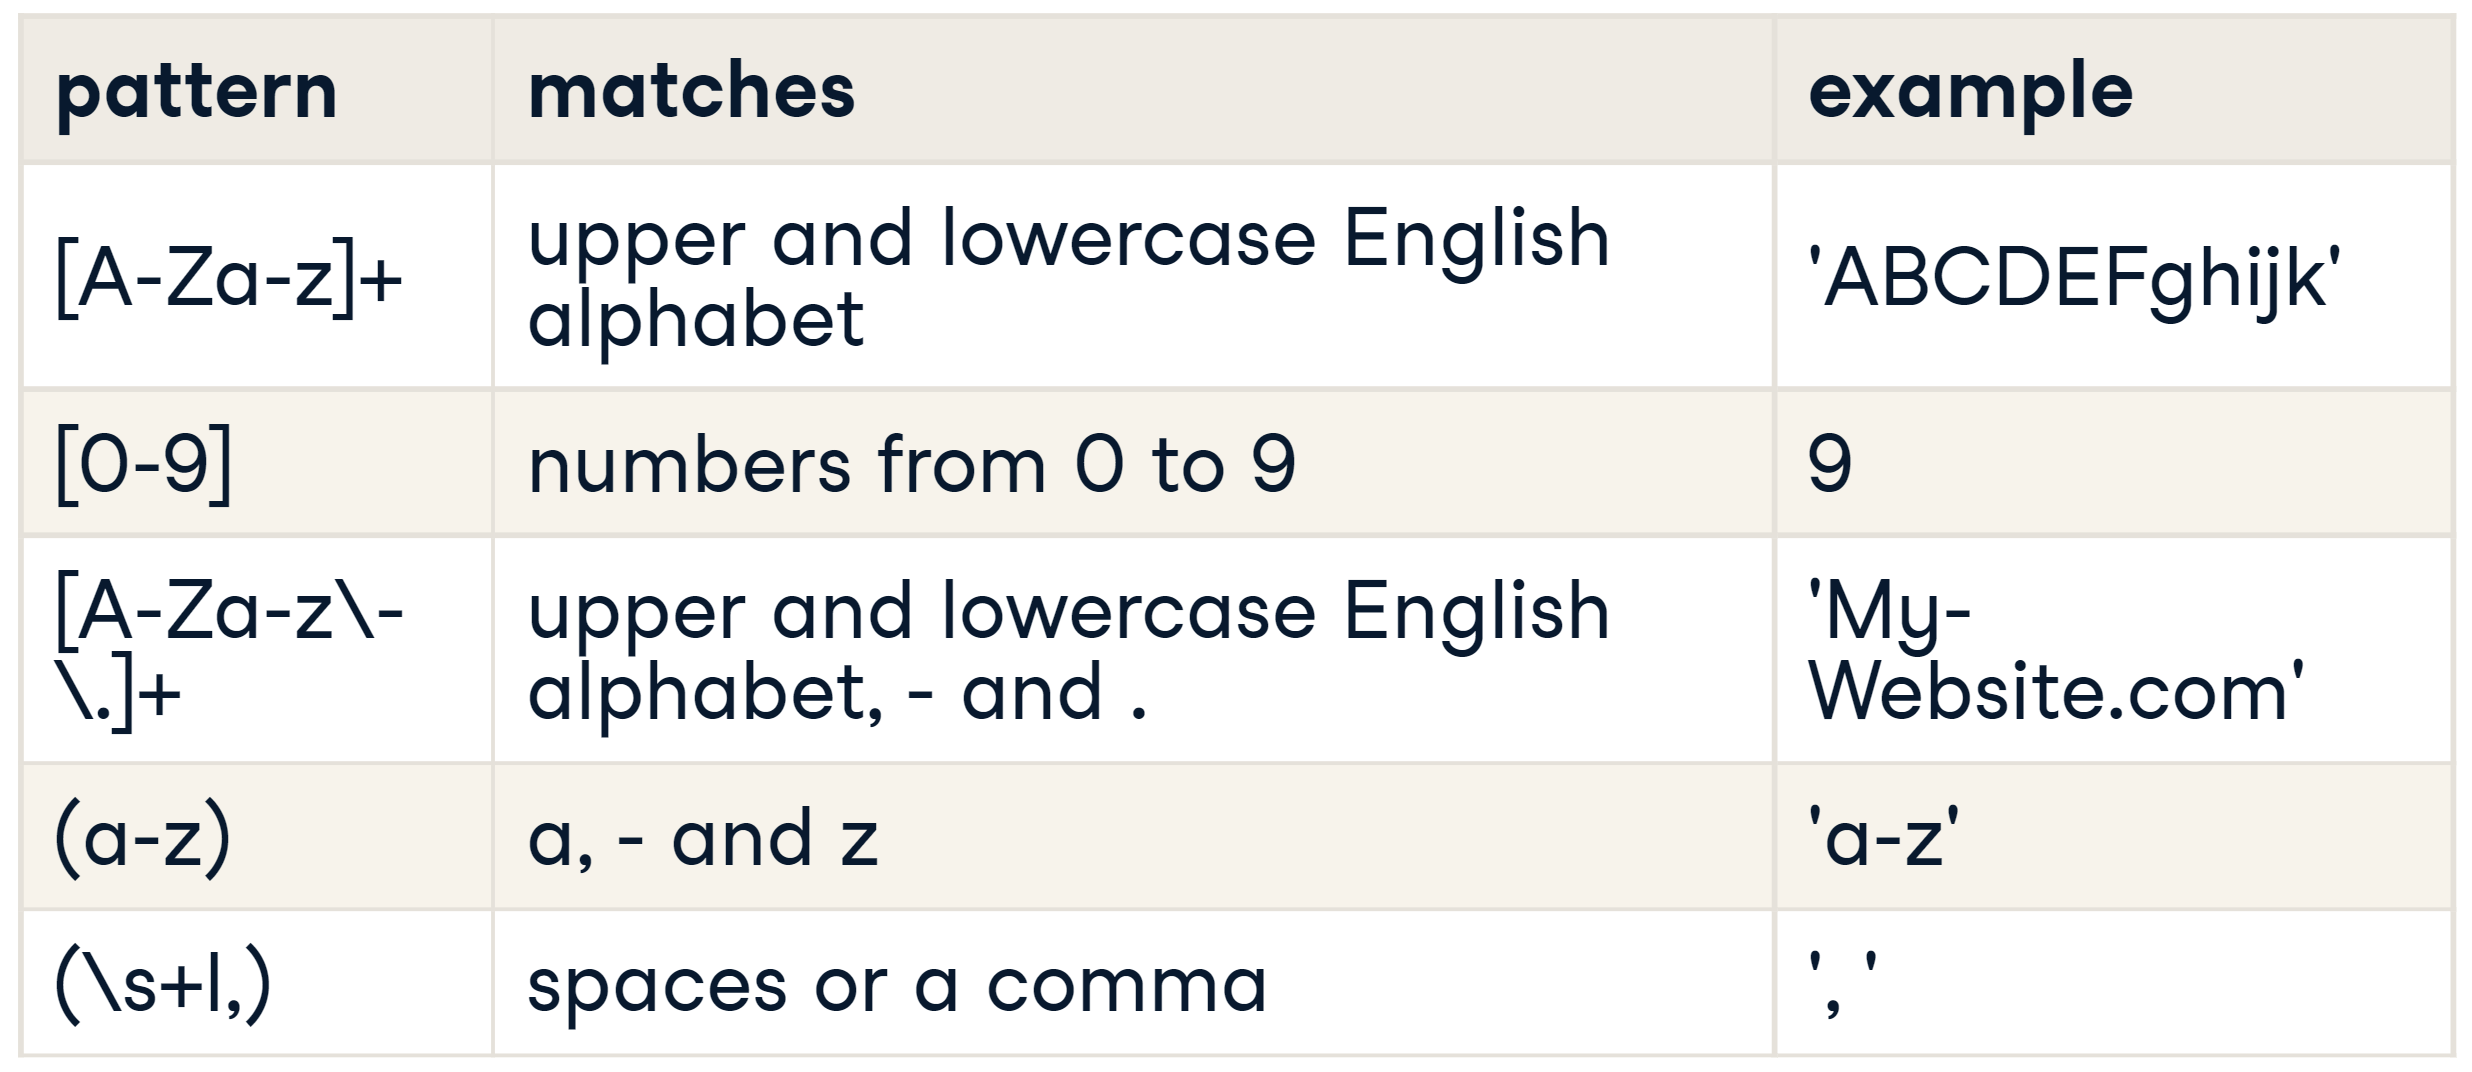

In [ ]:
# lowercase ascii+digits+spaces, once it hits comma, it can't match any more 
pattern = ('[a-z0-9 ]+')  
my_str = 'he has 12 cats and 10 dogs, but not ribbits'  
re.match(pattern, my_str)

<re.Match object; span=(0, 26), match='he has 12 cats and 10 dogs'>

In [ ]:
sentences_endings = r"[.?!]"  # pattern  
re.split(sentences_endings, my_string)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

In [ ]:
#Find all capitalized words A-Z
pattern = r"[A-Z]\w+"
re.findall(pattern, my_string)

['Let', 'RegEx', 'Won', 'Can', 'Or']

In [ ]:
# split my_string on spaces
pattern = r"\s+"
re.split(pattern, my_string)

["Let's",
 'write',
 'RegEx!',
 "Won't",
 'that',
 'be',
 'fun?',
 'I',
 'sure',
 'think',
 'so.',
 'Can',
 'you',
 'find',
 '4',
 'sentences?',
 'Or',
 'perhaps,',
 'all',
 '19',
 'words?']

In [ ]:
# Findall all digits
pattern = r"\d+"
re.findall(pattern, my_string)

['4', '19']

### Difference between **re.match & re.search**
- If you need find a pattern that might not be at the beginning og the string, you should use **"re.search"**

In [ ]:
re.match('cd','abcde')

In [ ]:
re.search('cd','abcde')

<re.Match object; span=(2, 4), match='cd'>

In [ ]:
scence_one = "After three weeks of hot weather and drought,we've had a week of cold and rain,\
just the way it ought to be here in the north,\
            in June, a fire going..."

In [ ]:
# search for the first occurrence of "three"
match = re.search("three", scence_one)

In [ ]:
# print the start and end indexes of match
print(match.start(), match.end())

6 11


In [ ]:
# script notation, e.g. 'Author:'
pattern = r"[\w\s]+:"  

### Regex with NLTK tokenization

In [ ]:
from nltk.tokenize import regexp_tokenize

In [ ]:
# Find hashtags (#)
pattern=r"#\w+"  
tweets = 'This is the best #nlp exercise ive found online! #python'
hashtags = regexp_tokenize(tweets, pattern)
hashtags

['#nlp', '#python']

In [ ]:
# Find both mentions (@) and hashtags (#)
pattern2= r"([#|@]\w+)"
tweets = 'Thanks @datacamp :) #nlp #python'
mentions_hashtags = regexp_tokenize(tweets, pattern2)
mentions_hashtags

['@datacamp', '#nlp', '#python']

In [ ]:
# using TweetTokenizer to tokenize all tweets into one list
from nltk.tokenize import TweetTokenizer
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning']
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
all_tokens

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning']]

In [ ]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

In [ ]:
# tokenize all words
import nltk
nltk.download('punkt')

from nltk import word_tokenize
word_tokenize(german_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Wann',
 'gehen',
 'wir',
 'Pizza',
 'essen',
 '?',
 '🍕',
 'Und',
 'fährst',
 'du',
 'mit',
 'Über',
 '?',
 '🚕']

In [ ]:
# Tokenize all capital words
pattern1 = r"[A-ZÜ]\w+"
regexp_tokenize(german_text, pattern1)

['Wann', 'Pizza', 'Und', 'Über']

In [ ]:
# Tokenize emjio
# Unicode ranges for emoji are:
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
regexp_tokenize(german_text, emoji)

['🍕', '🚕']

Spacy vs Gensim
https://info.cambridgespark.com/latest/word-embeddings-in-python


##Bag-of-words (BoW)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from collections import Counter
article = "The cat is in the box. The cat likes the box. The box is over the cat"
tokens = word_tokenize(article)
lower_tokens = [t.lower() for t in tokens]  # convert all tokens into lowercase
count = Counter(lower_tokens)
count

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'.': 2,
         'box': 3,
         'cat': 3,
         'in': 1,
         'is': 2,
         'likes': 1,
         'over': 1,
         'the': 6})

In [ ]:
count.most_common(2)  # return top 2 tokens in terms of frequency

[('The', 3), ('cat', 3)]

## Removing stopwords

In [ ]:
text = "The cat is in the box. The cat likes the box. The box is over the cat"
tokens = word_tokenize(text.lower())
tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 '.',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 '.',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [ ]:
# remove the non-alphabetical characters
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()] 
tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [ ]:
# remove the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
no_stops = [t for t in tokens if t not in stopwords.words('english')]
no_stops

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['cat', 'box', 'cat', 'likes', 'box', 'box', 'cat']

In [ ]:
Counter(no_stops).most_common(3)

[('cat', 3), ('box', 3), ('likes', 1)]

##Lemmatization

In [ ]:
poem ="""You will say it was quite unintentional,
this leaving the building without saying good-bye.
(“Can’t I depart, just once,
thinking only of daisies and chocolate pudding?…”)

There are in this world enchanters and enchantees.
It’s only the latter whose hearts are chained to heavy

    stones,
who could no more leave a room, forgetting you,
than they could, for several minutes, forget to breathe.

How lightly a goddess walks the earth,
evoking smiles in everyone,
but, still, you break our hearts–
like tigers stepping on sparrows’ eggs,
like a deer, walking silently through a strand of spiders’ silk,
taut between trees,
you break our hearts."""

In [ ]:
alpha_only = [w for w in word_tokenize(poem.lower()) if w.isalpha()]

In [ ]:
Counter(alpha_only).most_common(10)

[('you', 4),
 ('a', 4),
 ('the', 3),
 ('it', 2),
 ('this', 2),
 ('only', 2),
 ('of', 2),
 ('and', 2),
 ('are', 2),
 ('in', 2)]

In [ ]:
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

In [ ]:
Counter(no_stops).most_common(10)

[('hearts', 2),
 ('could', 2),
 ('break', 2),
 ('like', 2),
 ('say', 1),
 ('quite', 1),
 ('unintentional', 1),
 ('leaving', 1),
 ('building', 1),
 ('without', 1)]

In [ ]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(lemmatized).most_common(10)

[('heart', 2),
 ('could', 2),
 ('break', 2),
 ('like', 2),
 ('say', 1),
 ('quite', 1),
 ('unintentional', 1),
 ('leaving', 1),
 ('building', 1),
 ('without', 1)]

## **gensim** (NLP library)
  - Build document or word vectors
  - Performing topic identification and document comparsion

In [ ]:
from gensim.corpora.dictionary import Dictionary

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
my_documents = "God is Great Great! I won a big big lottery."

In [ ]:
from nltk.tokenize import sent_tokenize
my_documents = sent_tokenize(my_documents)
my_documents

['God is Great Great!', 'I won a big big lottery.']

In [ ]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
tokenized_docs

[['god', 'is', 'great', 'great', '!'],
 ['i', 'won', 'a', 'big', 'big', 'lottery', '.']]

In [ ]:
dictionary = Dictionary(tokenized_docs)  # create a mapping with an id for each token
dictionary

In [ ]:
dictionary.token2id

{'!': 0,
 '.': 4,
 'a': 5,
 'big': 6,
 'god': 1,
 'great': 2,
 'i': 7,
 'is': 3,
 'lottery': 8,
 'won': 9}

In [ ]:
# word -> id
dictionary.token2id.get('won')  # select the id for 'won'

9

In [ ]:
# id -> get word
dictionary.get(8)

'lottery'

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus
# output (token_id from the dictionary, frequency in the document)

[[(0, 1), (1, 1), (2, 2), (3, 1)],
 [(4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1)]]

In [ ]:
# sort the doc for frequency
doc = corpus[1]
bow_doc = sorted(doc, key=lambda x: x[1], reverse=True)
bow_doc

[(6, 2), (4, 1), (5, 1), (7, 1), (8, 1), (9, 1)]

In [ ]:
# Print top 3 words of the document alongside the count
for word_id, word_count in bow_doc[:3]:
  print(dictionary.get(word_id), word_count)

big 2
. 1
a 1


In [ ]:
dictionary.token2id

{'!': 0,
 '.': 4,
 'a': 5,
 'big': 6,
 'god': 1,
 'great': 2,
 'i': 7,
 'is': 3,
 'lottery': 8,
 'won': 9}

##Tf-idf with gensim

In [ ]:
from gensim.models.tfidfmodel import TfidfModel

In [ ]:
tfidf = TfidfModel(corpus)   # corpus : (token_id from the dictionary, frequency in the document)

In [ ]:
tfidf[corpus[0]]

[(0, 0.3779644730092272),
 (1, 0.3779644730092272),
 (2, 0.7559289460184544),
 (3, 0.3779644730092272)]

In [ ]:
tfidf_weights = tfidf[corpus[1]]   # (token_id, token_weight)
tfidf_weights

[(4, 0.3333333333333333),
 (5, 0.3333333333333333),
 (6, 0.6666666666666666),
 (7, 0.3333333333333333),
 (8, 0.3333333333333333),
 (9, 0.3333333333333333)]

In [ ]:
sorted_tfidf_weights = sorted(tfidf_weights, key = lambda w:w[1], reverse=True)
sorted_tfidf_weights

[(6, 0.6666666666666666),
 (4, 0.3333333333333333),
 (5, 0.3333333333333333),
 (7, 0.3333333333333333),
 (8, 0.3333333333333333),
 (9, 0.3333333333333333)]

In [ ]:
for term_id, weight in sorted_tfidf_weights[:3]:
  print(dictionary.get(term_id), weight)

big 0.6666666666666666
. 0.3333333333333333
a 0.3333333333333333


In [ ]:
tfidf_weights = [tfidf[doc] for doc in corpus]
tfidf_weights

[[(0, 0.3779644730092272),
  (1, 0.3779644730092272),
  (2, 0.7559289460184544),
  (3, 0.3779644730092272)],
 [(4, 0.3333333333333333),
  (5, 0.3333333333333333),
  (6, 0.6666666666666666),
  (7, 0.3333333333333333),
  (8, 0.3333333333333333),
  (9, 0.3333333333333333)]]

## SpaCy (NLP library)
  - Create NLP **pipelines** to generate corpora and models
  - open-source, with extra libraries and tools
    - Displacy (a visualization tool for viewing parse trees)
  - Informal language corpora
    - easily find entities in Tweets and chat messages

### Entity recognition

In [ ]:
import spacy
nlp = spacy.load('en')  # pre-trained corpus
nlp.entity

In [ ]:
doc = nlp("""Berlin is the capital of Germany;
         and the residence of Chancellor Angela Merkel""")   # pass a string into nlp variable

In [ ]:
doc.ents  # SpaCy properly tagged and identified the three main entities in the sentence

(Berlin, Germany, Angela Merkel)

In [ ]:
print(doc.ents[0], doc.ents[0].label_)  # GPE geopolitical entity

Berlin GPE


In [ ]:
for ent in doc.ents:
  print(ent.label_, ent.text)

GPE Berlin
GPE Germany
PERSON Angela Merkel


## polyglot
- vectors from differnent languages
- more than 130 (can be used for translation)

### Entity recognition

In [54]:
!pip install polyglot
!pip install PyICU
!pip install pycld2
!pip install morfessor

     |████████████████████████████████| 133kB 3.9MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52579 sha256=624b2cd90a3adb02fb123d923a78647641b6e74a51da5488fc64525f0085f8f0
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot
     |████████████████████████████████| 296kB 4.0MB/s 
  Created wheel for PyICU: filename=PyICU-2.7.3-cp37-cp37m-linux_x86_64.whl size=1344144 sha256=50f3d849500a8127980f04b3b97f44497348258a82855fbb06a0599fe8e36c99
  Stored in directory: /root/.cache/pip/wheels/16/ee/c0/0bd84f17a0b88107332ac0a73c146609c683b4a392e09b62be
Successfully built PyICU
     |████████████████████████████████| 41.4MB 105kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834219 sha256=3831097cd5875a23d6aeecfdd92bd99425e73a735f7b06e0fe0ab8a16348577a
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a

In [55]:
from polyglot.text import Text

In [74]:
text = "Voyez faits saillants de la conférence de presse du 15 juin du ministre de la Santé Christian Dubé, accompagné du directeur national de la santé publique Horacio Arruda et du directeur de la campagne de vaccination contre la COVID-19 au Québec, Daniel Paré sur l’épidémie de COVID-19." 

In [75]:
ptext = Text(text)  # polyglot doesn't need to be told which language you are using

In [78]:
!polyglot download embeddings2.fr
!polyglot download ner2.fr

[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...


In [79]:
ptext.entities

[I-PER(['Christian', 'Dubé']),
 I-PER(['Horacio', 'Arruda']),
 I-LOC(['Québec']),
 I-PER(['Daniel', 'Paré'])]